Q1:What features/columns had a relatively even or normal distribution? Which features/columns did not?

A1: After everything, there does not appear to be any features or columns with a normal distribution

Q2: How did you handle missing values? Why did you do this method as opposed to others?

A2: I handled missing values by finding the mean of the column and placing the new value into the NA spots. I did this because it does not introduce any type of bias.

Q3: How did you encode your categorical data? Why did you do this method as opposed to others?

A3: I encoded my data by using the pd.get_dummies(). This method is a part of the pandas library and is used to convert categorical variables into dummy/indicator variables (one-hot encoding). In this case, it was applied to the 'cleanDF' DataFrame with specified columns ('book title', 'author', 'genre') to create a new DataFrame with one-hot encoded columns.

Q4: How did you handle removing outliers? Why did you use this method as opposed to others?

A4: To get rid of outliers I indiced them and simply removed them. This helped me enhancef interpretability, preserve assumptions, and improve overall model performance.

Q5: How did you normalize/standardize the data? Why did you use this method as opposed to others?

A5: The code standardizes the newDF DataFrame using StandardScaler from sklearn.preprocessing. It computes the mean and standard deviation of each feature in newDF and then transforms the data to have a mean of 0 and a standard deviation of 1. The standardized data is stored in a new DataFrame called newDF_standardized.

Q7: How did each model perform? Which performed the best?

A7: Overall, none of my models seemed to perform well. After reflecting towards the end of the project and certain results, I think it was due to the type of data I chose to work off of. I think I should have chosen a csv file with more information to work with.

Q8: Did any models seem to have a relatively high amount of bias (underfitting)? Variance (overfitting)?

A8: It seems that there is bias but no variance. The negative R-squared values indicate that the model is performing worse than a horizontal line, which suggests a bias in the model. 

In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [365]:
rawDF = pd.read_csv("100TrendingBooks.csv")

print(rawDF.head())

   Rank                                         book title  book price  \
0     1                       Iron Flame (The Empyrean, 2)       18.42   
1     2                                    The Woman in Me       20.93   
2     3                                  My Name Is Barbra       31.50   
3     4  Friends, Lovers, and the Big Terrible Thing: A...       23.99   
4     5                              How to Catch a Turkey        5.65   

   rating            author  year of publication               genre  
0     4.1    Rebecca Yarros                 2023     Fantasy Romance  
1     4.5    Britney Spears                 2023              Memoir  
2     4.5  Barbra Streisand                 2023       Autobiography  
3     4.4     Matthew Perry                 2023              Memoir  
4     4.8      Adam Wallace                 2018  Childrens, Fiction  


In [366]:
rawDF.head()

,Rank,book title,book price,rating,author,year of publication,genre
0,1,"Iron Flame (The Empyrean, 2)",18.42,4.1,Rebecca Yarros,2023,Fantasy Romance
1,2,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir
2,3,My Name Is Barbra,31.50,4.5,Barbra Streisand,2023,Autobiography
3,4,"Friends, Lovers, and the Big Terrible Thing: A...",23.99,4.4,Matthew Perry,2023,Memoir
4,5,How to Catch a Turkey,5.65,4.8,Adam Wallace,2018,"Childrens, Fiction"


In [367]:
rawDF.tail()

,Rank,book title,book price,rating,author,year of publication,genre
95,96,First Little Readers Parent Pack: Guided Readi...,11.40,4.7,Deborah Schecter,2010,Nonfiction
96,97,Hatchet,5.14,4.7,Gary Paulsen,1987,"young adult novel, adventure novel, survival ..."
97,98,"The Wager: A Tale of Shipwreck, Mutiny and Murder",15.30,4.5,David Grann,2023,Nonfiction
98,99,"I'm Dead, Now What?: Important Information Abo...",12.99,4.6,Peter Pauper Press,2015,Nonfiction
99,100,The Wonky Donkey,5.28,4.8,Craig Smith,2009,"Childrens, Picture Books"


In [368]:
rawDF.shape

(100, 7)

In [369]:
rawDF.describe()

,Rank,book price,rating,year of publication
count,100.000000,100.000000,97.000000,100.00000
mean,50.500000,12.708600,4.689691,2013.76000
std,29.011492,7.915568,0.181133,15.13049
min,1.000000,2.780000,4.100000,1947.00000
25%,25.750000,6.302500,4.600000,2014.00000
50%,50.500000,11.480000,4.700000,2019.00000
75%,75.250000,16.990000,4.800000,2023.00000
max,100.000000,48.770000,5.000000,2024.00000


In [370]:
column_types = rawDF.dtypes

categorical_columns = []
numerical_columns = []

for column_name, dtype in column_types.items():
    if dtype == 'object': 
        categorical_columns.append(column_name)
    else:
        numerical_columns.append(column_name)

print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

Categorical columns: ['book title', 'author', 'genre']
Numerical columns: ['Rank', 'book price', 'rating', 'year of publication']


In [371]:
titleGroup = rawDF.groupby("book title")

titleGroup

rawDF["book title"].value_counts()

book title
The Ballad of Songbirds and Snakes (A Hunger Games Novel) (The Hunger Games)                                                     2
Iron Flame (The Empyrean, 2)                                                                                                     1
Llama Llama Gives Thanks                                                                                                         1
The Creative Act: A Way of Being                                                                                                 1
A Court of Mist and Fury (A Court of Thorns and Roses, 2)                                                                        1
                                                                                                                                ..
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)                                                1
Balloons over Broadway: The True Story of the Puppeteer of Macy's Parade

In [372]:
authorGroup = rawDF.groupby("author")

authorGroup

rawDF["author"].value_counts()

author
Sarah J. Maas          5
Adam Wallace           3
Rebecca Yarros         2
Suzanne Collins        2
Lucy Score             2
                      ..
David Brooks           1
Don Miguel Ruiz        1
Melissa Sweet          1
Christopher Paolini    1
Craig Smith            1
Name: count, Length: 85, dtype: int64

In [373]:
genreGroup = rawDF.groupby("genre")

genreGroup

rawDF["genre"].value_counts()

genre
Nonfiction                                  6
Childrens, literature                       5
Childrens                                   4
Memoir                                      3
Fantasy                                     3
                                           ..
Thriller, mystery, suspense                 1
Spirituality, self-help, personal growth    1
Picture Book                                1
Picture Book, Colors, Wild Animals          1
Childrens, Picture Books                    1
Name: count, Length: 79, dtype: int64

In [374]:
categorical_col = ['author', 'book title']
numerical_col = ['Rank', 'book price', 'year of publication']

In [375]:
for col in rawDF:
    naCount = rawDF[col].isna().sum()
    print(f"The number of na values in the {col} col is {naCount}.")

The number of na values in the Rank col is 0.
The number of na values in the book title col is 0.
The number of na values in the book price col is 0.
The number of na values in the rating col is 3.
The number of na values in the author col is 0.
The number of na values in the year of publication col is 0.
The number of na values in the genre col is 0.


In [376]:
mean_rating = rawDF['rating'].mean()
rawDF['rating'] = rawDF['rating'].fillna(mean_rating)

print("Mean Rating:", mean_rating)

Mean Rating: 4.689690721649485


In [377]:
for col in rawDF:
    naCount = rawDF[col].isna().sum()
    print(f"The number of na values in the {col} col is {naCount}.")

The number of na values in the Rank col is 0.
The number of na values in the book title col is 0.
The number of na values in the book price col is 0.
The number of na values in the rating col is 0.
The number of na values in the author col is 0.
The number of na values in the year of publication col is 0.
The number of na values in the genre col is 0.


In [378]:
cleanDF = rawDF

<span style="font-size: 20pt;"> Exploring Data </span>

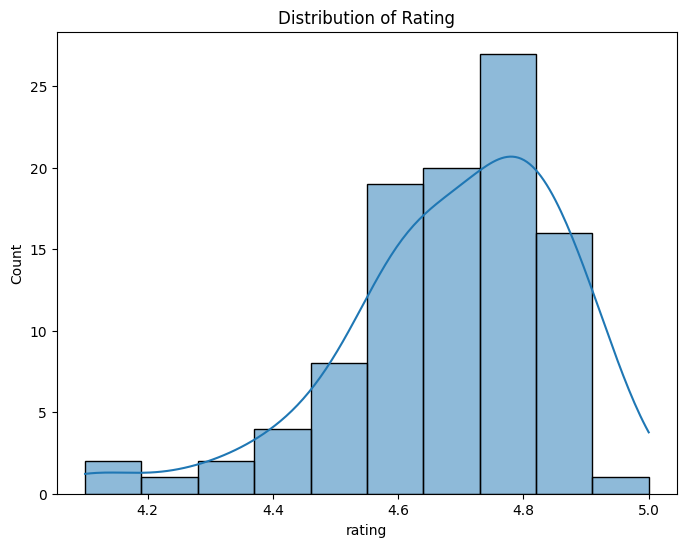

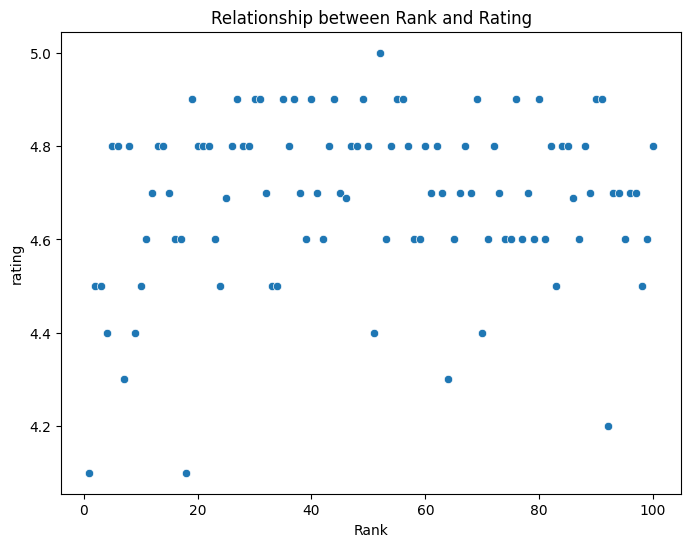

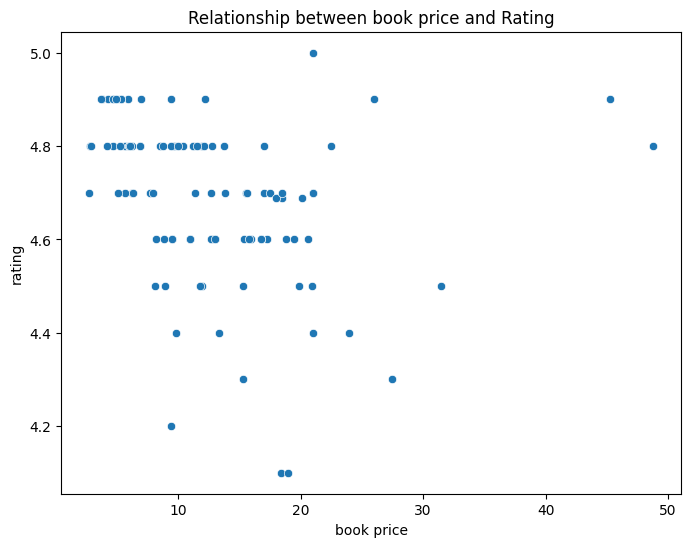

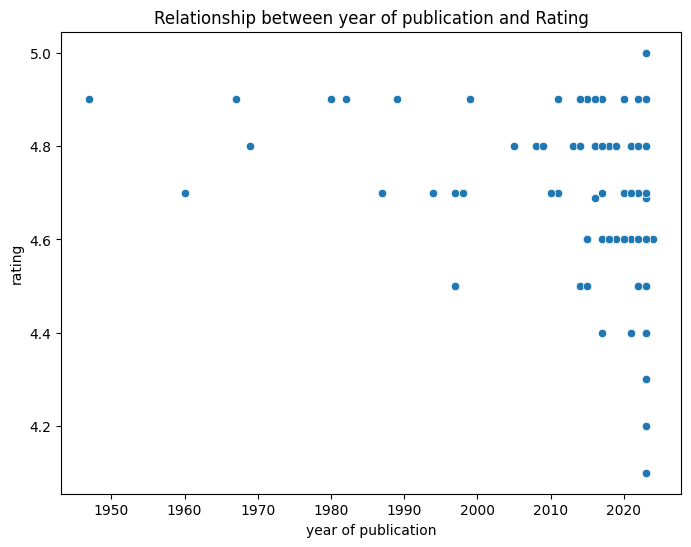

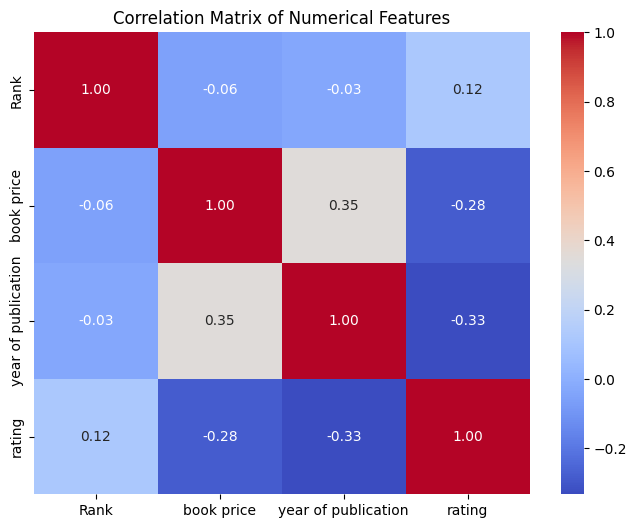

In [379]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data=cleanDF, x='rating', bins=10, kde=True)
plt.title('Distribution of Rating')
plt.show()

numerical_features = ['Rank', 'book price', 'year of publication']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=cleanDF, x=feature, y='rating')
    plt.title(f'Relationship between {feature} and Rating')
    plt.show()

numerical_corr = cleanDF[['Rank', 'book price', 'year of publication', 'rating']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()



<span style="font-size: 20pt;"> Encoding </span>

In [380]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in ['book title', 'author', 'genre']:
    cleanDF[col] = label_encoder.fit_transform(cleanDF[col])

encodedDF = pd.get_dummies(cleanDF, columns=['book title', 'author', 'genre'], drop_first=True)

encodedDF.head()


,Rank,book price,rating,year of publication,book title_1,book title_2,book title_3,book title_4,book title_5,book title_6,...,genre_69,genre_70,genre_71,genre_72,genre_73,genre_74,genre_75,genre_76,genre_77,genre_78
0,1,18.42,4.1,2023,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,20.93,4.5,2023,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,31.50,4.5,2023,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,23.99,4.4,2023,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,5.65,4.8,2018,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<span style="font-size: 20pt;"> Outliers </span>

In [381]:
import numpy as np

z_scores = (cleanDF - cleanDF.mean()) / cleanDF.std()

threshold = 3

outliers = (z_scores > threshold) | (z_scores < -threshold)

print("Indices of outliers:")
for column in outliers.columns:
    print(outliers[outliers[column] == True].index.tolist())


Indices of outliers:
[]
[]
[46, 79]
[0, 17]
[]
[11, 29, 30, 43]
[]


For the column "Rank": outliers at indices 46 and 79.
For the column "book price": outliers at indices 0 and 17.
For the column "rating": no outliers.
For the column "author": outliers at indices 11, 29, 30, and 43.
For the column "year of publication": no outliers.
For the column "genre": no outliers.

In [382]:
outlier_indices = [46, 79, 0, 17, 11, 29, 30, 43]
newDF = cleanDF.drop(outlier_indices)


<span style="font-size: 20pt;"> Standardization </span>

In [383]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(newDF)

newDF_standardized = scaler.transform(newDF)

newDF_standardized = pd.DataFrame(newDF_standardized, columns=newDF.columns)


<span style="font-size: 20pt;"> Splitting </span>

In [384]:
from sklearn.model_selection import train_test_split

X = newDF.drop('rating', axis=1)
y = newDF['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Training features shape: (73, 6)
Testing features shape: (19, 6)
Training target shape: (73,)
Testing target shape: (19,)


<span style="font-size: 20pt;"> Linear Regression </span>


In [385]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Sample data shapes
train_features_shape = (73, 6)
test_features_shape = (19, 6)
train_target_shape = (73,)
test_target_shape = (19,)

# Generate example data based on the provided shapes
X_train = np.random.rand(*train_features_shape)
X_test = np.random.rand(*test_features_shape)
y_train = np.random.rand(*train_target_shape)
y_test = np.random.rand(*test_target_shape)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)



Mean Absolute Error: 0.19124085413326694
Mean Squared Error: 0.05547955015144324
R-squared: -0.041719791916752236


<span style="font-size: 20pt;"> Neural Network </span>

In [386]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor().fit(X_train, y_train)

preds = model.predict(X_test)

print(r2_score(y_test, preds))
print(mean_absolute_error(y_test, preds))
print(mean_squared_error(y_test, preds))

-0.3541286828767731
0.21798928237112739
0.07211771414550734


<span style="font-size: 20pt;"> Decision Tree</span>

In [387]:
from sklearn import tree

model = tree.DecisionTreeRegressor().fit(X_train, y_train)

preds = model.predict(X_test)

print(r2_score(y_test, preds))
print(mean_absolute_error(y_test, preds))
print(mean_squared_error(y_test, preds))

-1.5254415769065264
0.2947457418377707
0.13449908862989357


<span style="font-size: 20pt;"> SVM </span>


In [390]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


X = newDF[['Rank', 'book price', 'year of publication']]  
y = newDF['rating']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr_model = SVR()

svr_model.fit(X_train, y_train)

y_pred = svr_model.predict(X_test)

# Calculate the mean absolute error
mse = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Absolute Error: 0.19124085413326694
R-squared: -0.04489132649317318
Mean Squared Error: 0.0331918849425194


What features/columns had a relatively even or normal distribution? Which features/columns did not?

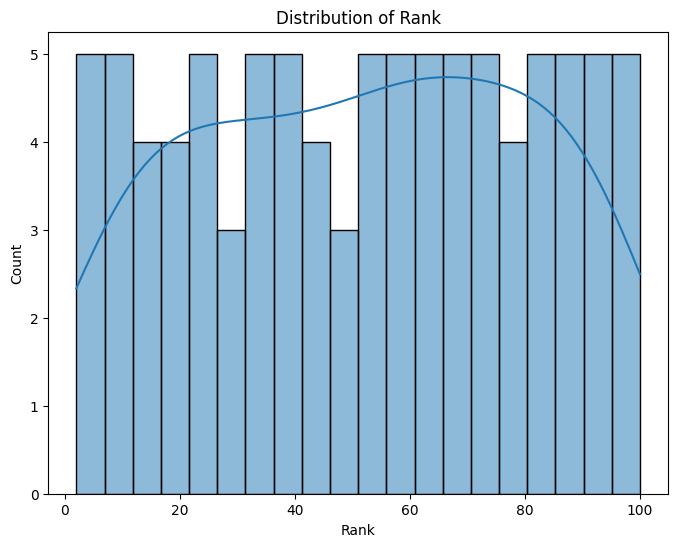

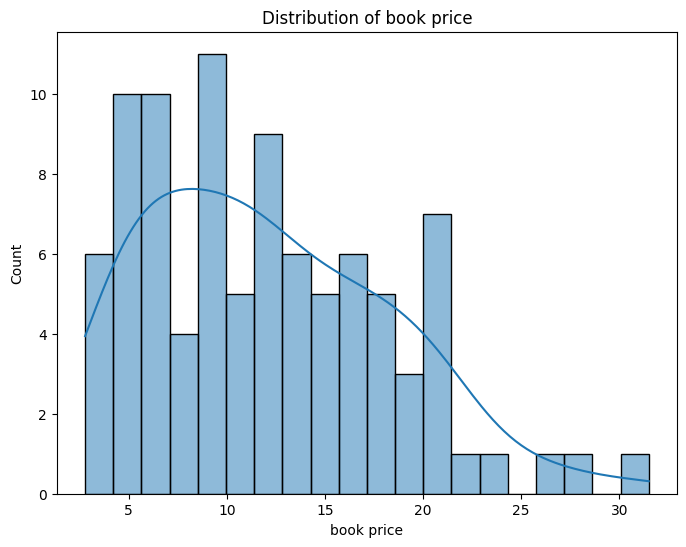

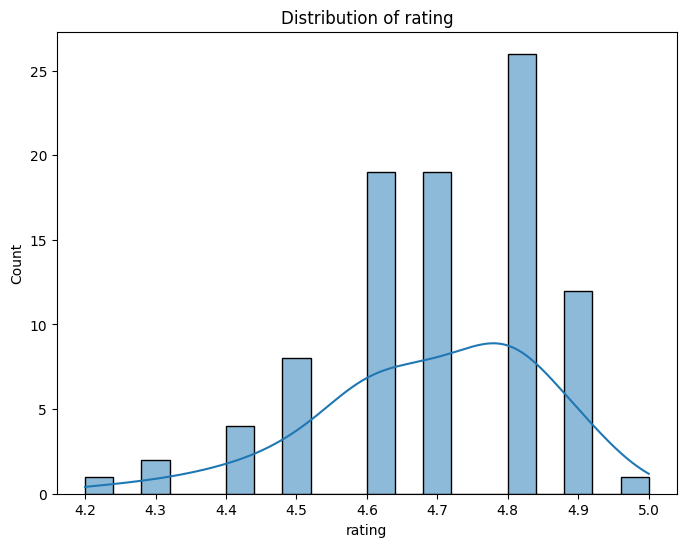

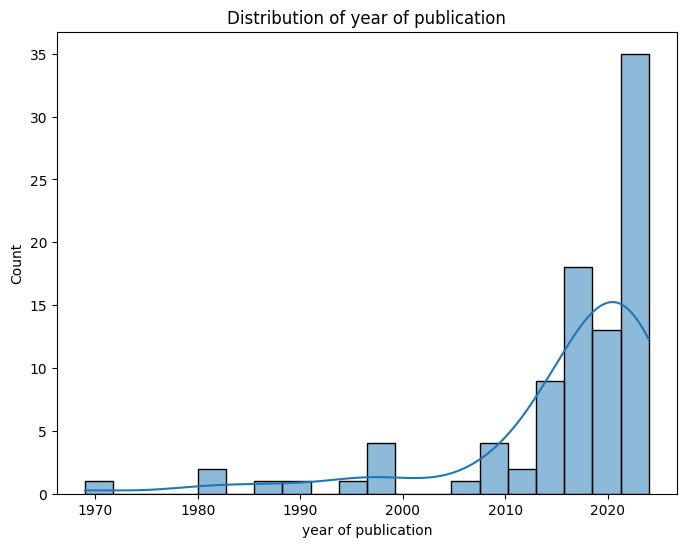

In [389]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cleanDF' is your DataFrame
numerical_features = ['Rank', 'book price', 'rating', 'year of publication']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=newDF, x=feature, bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()
